In [1]:
import keras
def createModel(n_cols):
  model = keras.Sequential([

          keras.layers.Dense(units=128, activation='relu'),
          keras.layers.Dense(units=128, activation='relu'),
          keras.layers.Dense(units=64, activation='relu'),
          keras.layers.Dropout(0.25),
          keras.layers.Dense(units=32, activation='relu'),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(units=8, activation='relu'),
          keras.layers.Dense(units=n_cols, activation='softmax'),
      ]
      )


  model.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model



In [2]:
%cd /content/drive/MyDrive/fut_scout

/content/drive/MyDrive/fut_scout


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras import callbacks
import pandas as pd

df = pd.read_csv('data/goalkeeper.csv').drop(['Unnamed: 0','Name', 'Position'], axis=1)
df_full = pd.read_csv('data/goalkeeper.csv').drop(['Unnamed: 0'], axis=1)
X = df.drop(['Classes'], axis = 1).values
y = df['Classes']

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.36, random_state=14)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
n_cols = len(np.unique(y))

Epoch 1/150
24/24 [==============================] - 1s 14ms/step - loss: 1.3358 - accuracy: 0.4062 - val_loss: 1.1953 - val_accuracy: 0.7083
Epoch 2/150
24/24 [==============================] - 0s 5ms/step - loss: 1.0259 - accuracy: 0.6445 - val_loss: 0.6133 - val_accuracy: 0.8021
Epoch 3/150
24/24 [==============================] - 0s 5ms/step - loss: 0.6677 - accuracy: 0.7253 - val_loss: 0.4200 - val_accuracy: 0.8177
Epoch 4/150
24/24 [==============================] - 0s 5ms/step - loss: 0.4731 - accuracy: 0.8060 - val_loss: 0.3042 - val_accuracy: 0.8385
Epoch 5/150
24/24 [==============================] - 0s 5ms/step - loss: 0.3672 - accuracy: 0.8529 - val_loss: 0.2197 - val_accuracy: 0.9271
Epoch 6/150
24/24 [==============================] - 0s 5ms/step - loss: 0.2812 - accuracy: 0.9102 - val_loss: 0.1617 - val_accuracy: 0.9427
Epoch 7/150
24/24 [==============================] - 0s 5ms/step - loss: 0.2059 - accuracy: 0.9271 - val_loss: 0.1029 - val_accuracy: 0.9688
Epoch 8/150


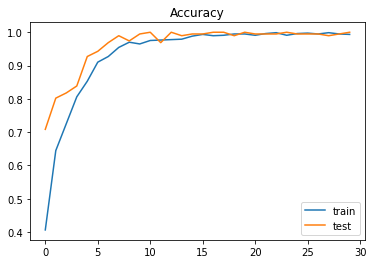

In [22]:
import matplotlib.pyplot as plt

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.36, random_state=14)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
n_cols = len(np.unique(y))

model = createModel(n_cols)

early_stopping = callbacks.EarlyStopping(
        min_delta=0.00001,
        patience=6,
        restore_best_weights=True,
    )

history = model.fit(X_train, y_train, batch_size=32, epochs=150, callbacks=[early_stopping], validation_split=0.2)
model.save('models/model_goalkeeper.h5')

plt.clf()
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.savefig('figures/goalkeeper_loss.png')

plt.clf()
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.savefig('figures/goalkeeper_acc.png')

# ANN

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
model = keras.models.load_model('models/model_goalkeeper.h5')
y_pred = model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(
        y_test.argmax(axis=1), y_pred.argmax(axis=1))
p = sns.heatmap(pd.DataFrame(cnf_matrix),
                annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig('figures/ann_cm_goalkeeper.png')

plt.clf()



<Figure size 432x288 with 0 Axes>

#KNN

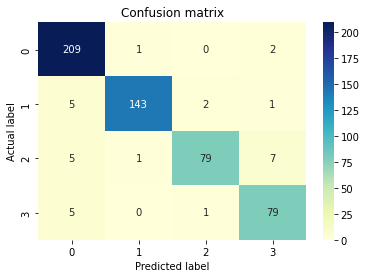

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(
        y_test.argmax(axis=1), y_pred.argmax(axis=1))
p = sns.heatmap(pd.DataFrame(cnf_matrix),
                annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig('figures/knn_cm_goalkeeper.png')


# Decision Tree

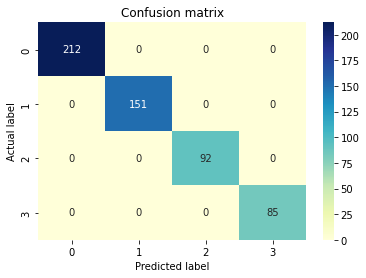

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
cnf_matrix = metrics.confusion_matrix(
        y_test.argmax(axis=1), y_pred.argmax(axis=1))
p = sns.heatmap(pd.DataFrame(cnf_matrix),
                annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig('figures/dt_cm_goalkeeper.png')

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

arr = [34, 177, 80, 70, 96, 22, 96, 250, 150]
print(X)
data = [arr]
print(data)
sc = StandardScaler()
X_new = np.append(X, data, axis=0)
X_new = sc.fit_transform(X_new)

X_new[len(X_new)-1, :]
model = keras.models.load_model('model.h5')
pred = model.predict(X_new)

print(pred.argmax(axis=1)[len(pred) - 1])
sameUsers = df_full.loc[df_full['Classes'] == pred.argmax(axis=1)[len(pred) - 1]][ :5]
sameUsers_array = sameUsers.to_json()
sameUsers_array

[[ 0.72178538  1.10101545  0.36507093 ...  1.47354829  0.55298859
   0.72746879]
 [ 1.49040533  1.4724503  -0.32986104 ...  1.47354829 -0.96621084
   0.72746879]
 [-1.12290251 -1.37521691  1.52329089 ...  1.47354829  0.04658878
  -1.25481001]
 ...
 [-1.12290251 -1.12759368  1.52329089 ...  0.64436125  0.04658878
   0.52098141]
 [-0.96917852  0.48195736 -0.32986104 ... -1.4700657  -0.45981103
  -1.75037971]
 [-0.96917852 -0.01328911 -0.56150503 ... -1.13839088 -1.47261064
   0.31449404]]
[[34, 177, 80, 70, 96, 22, 96, 250, 150]]
0


'{"Name":{"1":"Andrew Bentley","7":"Michael Williamson","9":"Mark Davis","13":"Matthew Lee","15":"Gregory Rowe"},"Position":{"1":"Goalkeeper","7":"Goalkeeper","9":"Goalkeeper","13":"Goalkeeper","15":"Goalkeeper"},"Age":{"1":34,"7":16,"9":16,"13":25,"15":29},"Height":{"1":198,"7":177,"9":190,"13":177,"15":190},"Weight":{"1":77,"7":80,"9":77,"13":70,"15":85},"Clean Sheet":{"1":70,"7":48,"9":70,"13":48,"15":54},"Long Ball":{"1":96,"7":96,"9":88,"13":88,"15":96},"Side Ball":{"1":96,"7":52,"9":96,"13":35,"15":96},"Penalty Kick Off":{"1":96,"7":76,"9":45,"13":80,"15":25},"Running Distance":{"1":250,"7":200,"9":250,"13":500,"15":300},"Number of Matches":{"1":150,"7":102,"9":150,"13":102,"15":149},"Classes":{"1":0,"7":0,"9":0,"13":0,"15":0}}'